In [1]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.datasets import load_digits
import time

In [2]:
digits = load_digits()
X = digits.data  
y = digits.target.reshape(-1, 1)


In [3]:
def standard_scale(X):
    mean = np.mean(X, axis=0)
    std = np.std(X, axis=0)
    std[std == 0] = 1  
    return (X - mean) / std

In [4]:
def one_hot_encode(y, num_classes):
    y_encoded = np.zeros((y.shape[0], num_classes))
    y_encoded[np.arange(y.shape[0]), y] = 1
    return y_encoded

In [5]:
def train_test_split(X, y, test_ratio=0.2, seed=42):
    np.random.seed(seed)
    indices = np.random.permutation(len(X))
    test_size = int(len(X) * test_ratio)
    test_indices = indices[:test_size]
    train_indices = indices[test_size:]
    return X[train_indices], X[test_indices], y[train_indices], y[test_indices]

In [6]:
def sigmoid(x):
    return 1 / (1 + np.exp(-x))

def sigmoid_derivative(x):
    return x * (1 - x)

In [7]:
X = standard_scale(X)
y_encoded = one_hot_encode(y, 10)
X_train, X_test, y_train, y_test = train_test_split(X, y_encoded)

In [8]:
np.random.seed(1)
W1 = 2 * np.random.randn(64, 32) - 1
b1 = np.zeros((1, 32))
W2 = 2 * np.random.randn(32, 10) - 1
b2 = np.zeros((1, 10))

lr = 0.00051
epochs = 6500

In [9]:
losses = []
accuracies = []
times = []

start_time = time.time()

for epoch in range(epochs):
    z1 = np.dot(X_train, W1) + b1
    a1 = sigmoid(z1)
    z2 = np.dot(a1, W2) + b2
    a2 = sigmoid(z2)

    error = y_train - a2
    loss = np.mean(np.square(error))
    losses.append(loss)

    pred_labels = np.argmax(a2, axis=1)
    true_labels = np.argmax(y_train, axis=1)
    acc = np.mean(pred_labels == true_labels)
    accuracies.append(acc)

    times.append(time.time() - start_time)

    delta2 = error * sigmoid_derivative(a2)
    delta1 = delta2.dot(W2.T) * sigmoid_derivative(a1)

    W2 += a1.T.dot(delta2) * lr
    b2 += np.sum(delta2, axis=0, keepdims=True) * lr
    W1 += X_train.T.dot(delta1) * lr
    b1 += np.sum(delta1, axis=0, keepdims=True) * lr

    if epoch % 50 == 0:
        print(f"Epoch {epoch}, Loss: {loss:.4f}, Accuracy: {acc*100:.2f}%")

Epoch 0, Loss: 0.9528, Accuracy: 0.49%
Epoch 50, Loss: 0.8804, Accuracy: 0.28%
Epoch 100, Loss: 0.8627, Accuracy: 0.21%
Epoch 150, Loss: 0.8133, Accuracy: 0.14%
Epoch 200, Loss: 0.7212, Accuracy: 0.00%
Epoch 250, Loss: 0.6454, Accuracy: 0.00%
Epoch 300, Loss: 0.5322, Accuracy: 0.00%
Epoch 350, Loss: 0.4586, Accuracy: 0.00%
Epoch 400, Loss: 0.3909, Accuracy: 0.00%
Epoch 450, Loss: 0.2518, Accuracy: 0.00%
Epoch 500, Loss: 0.2134, Accuracy: 0.00%
Epoch 550, Loss: 0.2035, Accuracy: 0.00%
Epoch 600, Loss: 0.1991, Accuracy: 0.00%
Epoch 650, Loss: 0.1953, Accuracy: 0.00%
Epoch 700, Loss: 0.1907, Accuracy: 0.00%
Epoch 750, Loss: 0.1846, Accuracy: 0.00%
Epoch 800, Loss: 0.1759, Accuracy: 0.00%
Epoch 850, Loss: 0.1491, Accuracy: 0.07%
Epoch 900, Loss: 0.0979, Accuracy: 0.07%
Epoch 950, Loss: 0.0951, Accuracy: 0.14%
Epoch 1000, Loss: 0.0939, Accuracy: 0.14%
Epoch 1050, Loss: 0.0929, Accuracy: 0.14%
Epoch 1100, Loss: 0.0919, Accuracy: 0.14%
Epoch 1150, Loss: 0.0905, Accuracy: 0.14%
Epoch 1200, Los

In [10]:
z1_test = np.dot(X_test, W1) + b1
a1_test = sigmoid(z1_test)
z2_test = np.dot(a1_test, W2) + b2
a2_test = sigmoid(z2_test)

final_preds = np.argmax(a2_test, axis=1)
final_true = np.argmax(y_test, axis=1)
final_accuracy = np.mean(final_preds == final_true)
print(f"\n✅ Test accuracy: {final_accuracy * 100:.2f}%")


✅ Test accuracy: 31.48%


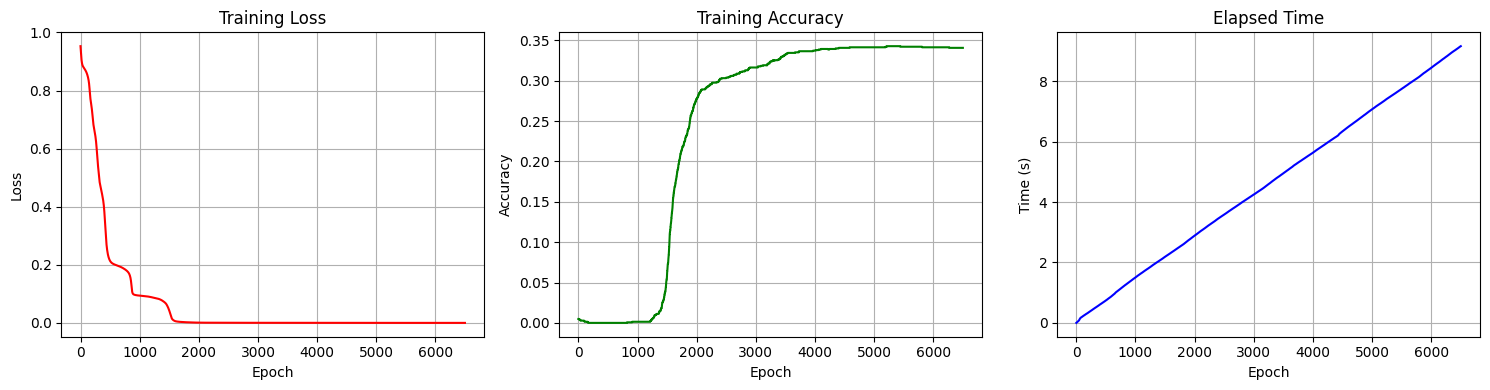

In [11]:
plt.figure(figsize=(15, 4))

plt.subplot(1, 3, 1)
plt.plot(losses, label="Loss", color='red')
plt.title("Training Loss")
plt.xlabel("Epoch")
plt.ylabel("Loss")
plt.grid(True)

plt.subplot(1, 3, 2)
plt.plot(accuracies, label="Accuracy", color='green')
plt.title("Training Accuracy")
plt.xlabel("Epoch")
plt.ylabel("Accuracy")
plt.grid(True)

plt.subplot(1, 3, 3)
plt.plot(times, label="Time (s)", color='blue')
plt.title("Elapsed Time")
plt.xlabel("Epoch")
plt.ylabel("Time (s)")
plt.grid(True)

plt.tight_layout()
plt.show()